In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
##Reading data
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

# EDA

In [3]:
df_train.shape,df_test.shape,sample.shape

((8693, 14), (4277, 13), (4277, 2))

In [4]:
df_train.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
df_test.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
sample.head(5)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [7]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [11]:
df_train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [12]:
df_test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

## Dealing with N/A Values

In [13]:
# name sof the columns
df_train.columns.values
# categorical varables_'HomePlanet','CryoSleep','Cabin','Destination', ,'Name','VIP'.
# Numerical varaibles_'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [14]:
# To check the missing values in data
df_train.isnull().sum()
# there were 14 columns out of which 7 are categorical variable and others are numeric
# we are going to deal with the missing value in numeric by taking the mean
# there are 12 columns in which values are missing

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [15]:
# we are going to take the numeric columns and filling the missing value by mean
missing_col = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df_train.loc[df_train.loc[:,i].isnull(),i]=df_train.loc[:,i].mean()

In [16]:
# After filling the  missing values in numerical columns
df_train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [17]:
# checking the modes of the categorical varables
print(df_train['HomePlanet'].mode())
print(df_train['CryoSleep'].mode())
print(df_train['Destination'].mode())
print(df_train['VIP'].mode())

0    Earth
dtype: object
0    False
dtype: object
0    TRAPPIST-1e
dtype: object
0    False
dtype: object


In [18]:
# we are going to fill the missing values in categorical variables by using mode
df_train['HomePlanet'].fillna('Earth', inplace=True) 
df_train['CryoSleep'].fillna(False , inplace=True) 
df_train['Destination'].fillna('TRAPPIST-1e', inplace=True) 
df_train['VIP'].fillna(False, inplace=True) 

In [19]:
df_train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [20]:
# we are going to fill the missing value in numerical columns by taking mean
missing_col = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 df_test.loc[df_test.loc[:,i].isnull(),i]=df_test.loc[:,i].mean()

In [21]:
# After filling the missing values in numerical column
df_test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [22]:
# checking the modes of the categorical varables
print(df_test['HomePlanet'].mode())
print(df_test['CryoSleep'].mode())
print(df_test['Destination'].mode())
print(df_test['VIP'].mode())

0    Earth
dtype: object
0    False
dtype: object
0    TRAPPIST-1e
dtype: object
0    False
dtype: object


In [23]:
# filling the missing values by using mode's of the categorical columns
df_test['HomePlanet'].fillna('Earth', inplace=True) 
df_test['CryoSleep'].fillna(False, inplace=True) 
df_test['Destination'].fillna('TRAPPIST-1e', inplace=True) 
df_test['VIP'].fillna(False, inplace=True)

In [24]:
#After removing the missing  values  in categorical varables 
df_test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

# Visualization

## Univariate Analysis

In [25]:
def bar_plot(data,variable):
    """
        input: variable ex: "HomePlanet"
        output: bar plot & value count
    """
    # get feature
    var = data[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

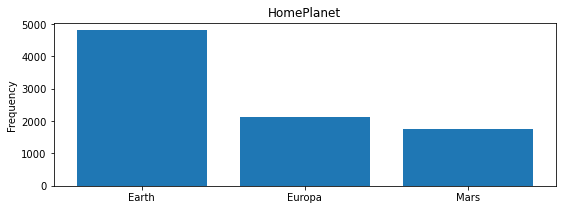

HomePlanet: 
 Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


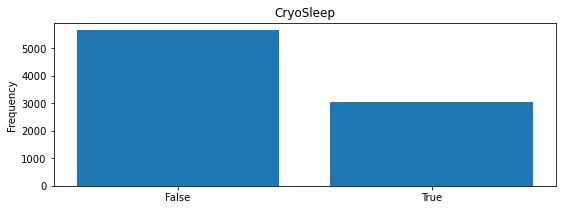

CryoSleep: 
 False    5656
True     3037
Name: CryoSleep, dtype: int64


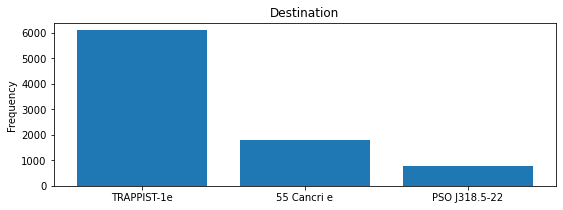

Destination: 
 TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


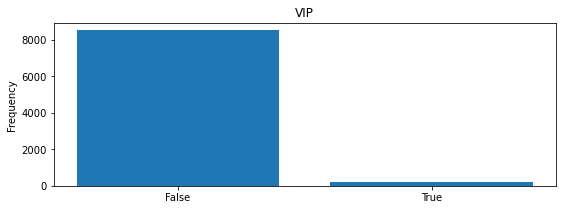

VIP: 
 False    8494
True      199
Name: VIP, dtype: int64


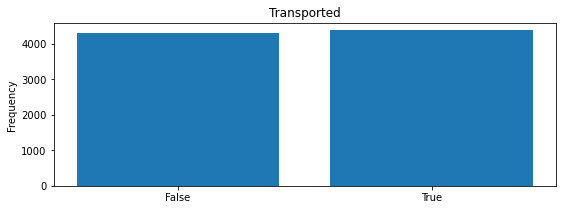

Transported: 
 True     4378
False    4315
Name: Transported, dtype: int64


In [26]:
category1 = ["HomePlanet","CryoSleep","Destination","VIP","Transported"]
for c in category1:
    bar_plot(df_train,c)

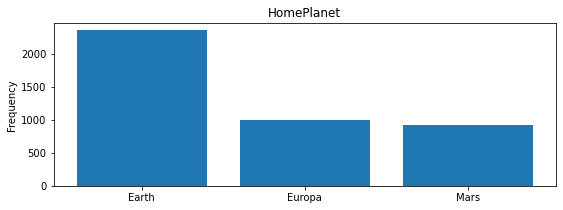

HomePlanet: 
 Earth     2350
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64


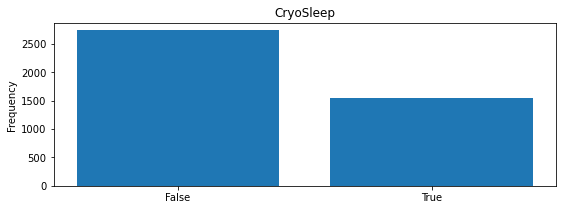

CryoSleep: 
 False    2733
True     1544
Name: CryoSleep, dtype: int64


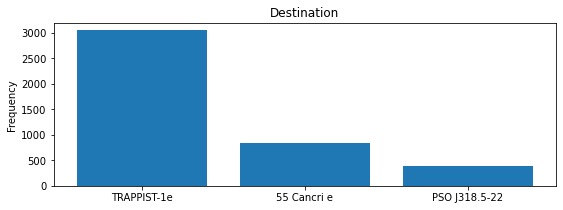

Destination: 
 TRAPPIST-1e      3048
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64


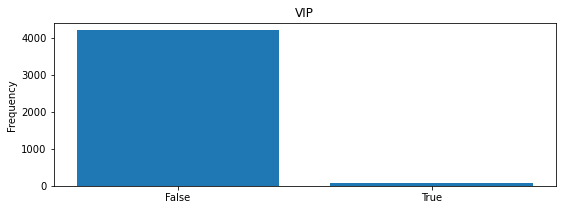

VIP: 
 False    4203
True       74
Name: VIP, dtype: int64


In [27]:
category1 = ["HomePlanet","CryoSleep","Destination","VIP"]
for c in category1:
    bar_plot(df_test,c)

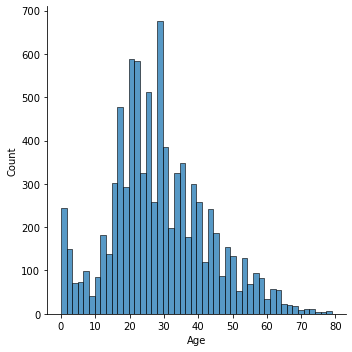

In [28]:
sns.displot(df_train.Age.dropna());

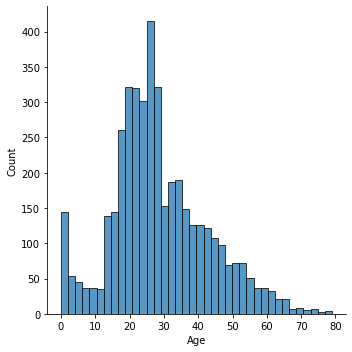

In [29]:
sns.displot(df_test.Age.dropna());

## Bivariate Analysis

## Multi-variate Analysis

## Feature Engineering

In [30]:
df_train[['deck', 'num','side']] = df_train['Cabin'].str.split('/', expand=True)
df_train=df_train.drop(['Cabin'],axis=1)

In [31]:
df_test[['deck', 'num','side']] = df_test['Cabin'].str.split('/', expand=True)
df_test=df_test.drop(['Cabin'],axis=1)

In [32]:
df_train['GroupID'] = df_train['PassengerId'].apply(lambda x: x.split('_')[0])
df_train['PassengerNo'] = df_train['PassengerId'].apply(lambda x: x.split('_')[1])
df_train=df_train.drop(['PassengerId'],axis=1)

In [34]:
df_test['GroupID'] = df_test['PassengerId'].apply(lambda x: x.split('_')[0])
df_test['PassengerNo'] = df_test['PassengerId'].apply(lambda x: x.split('_')[1])
df_test=df_test.drop(['PassengerId'],axis=1)

In [35]:
df_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side,GroupID,PassengerNo
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,0001,01
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,0002,01
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,0003,01
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,0003,02
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,A,98,P,9276,01
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,G,1499,S,9278,01
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,G,1500,S,9279,01
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,E,608,S,9280,01


In [36]:
df_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side,GroupID,PassengerNo
0,Earth,True,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S,0013,01
1,Earth,False,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S,0018,01
2,Europa,True,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S,0019,01
3,Europa,False,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S,0021,01
4,Earth,False,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S,0023,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S,9266,02
4273,Earth,False,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,NaN,NaN,9269,01
4274,Mars,True,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P,9271,01
4275,Europa,False,TRAPPIST-1e,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P,9273,01
